In [1]:
import pandas as pd
import json
import requests
#from api_keys import crime_api_key
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
ori_id = "TX0840400"
data_2007 = pd.read_csv("nibrs_incident_2007.csv")
data_2008 = pd.read_csv("nibrs_incident_2008.csv")
data_2009 = pd.read_csv("nibrs_incident_2009.csv")

C:\Users\Oleg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_formated_2007 = data_2007[["incident_date", "ddocname"]]
data_formated_2008 = data_2008[["incident_date", "ddocname"]]
data_formated_2009 = data_2009[["incident_date", "ddocname"]]

In [4]:
data_formated_2007["incident_date"] = data_formated_2007["incident_date"].str[5:7]
data_formated_2008["incident_date"] = data_formated_2008["incident_date"].str[5:7]
data_formated_2009["incident_date"] = data_formated_2009["incident_date"].str[5:7]

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [5]:
data_formated_2007["ddocname"] = data_formated_2007["ddocname"].str[8:17]
data_formated_2008["ddocname"] = data_formated_2008["ddocname"].str[8:17]
data_formated_2009["ddocname"] = data_formated_2009["ddocname"].str[8:17]

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [6]:
data_formated_2007.rename(columns={"ddocname":"agency_name"}, inplace=True)
data_formated_2008.rename(columns={"ddocname":"agency_name"}, inplace=True)
data_formated_2009.rename(columns={"ddocname":"agency_name"}, inplace=True)

C:\Users\Oleg\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [7]:
final_galveston_data_2007 = data_formated_2007.loc[data_formated_2007["agency_name"] == ori_id]
final_galveston_data_2008 = data_formated_2008.loc[data_formated_2008["agency_name"] == ori_id]
final_galveston_data_2009 = data_formated_2009.loc[data_formated_2009["agency_name"] == ori_id]

In [8]:
info_plot_2007 = final_galveston_data_2007.groupby("incident_date").count()
info_plot_2008 = final_galveston_data_2008.groupby("incident_date").count()
info_plot_2009 = final_galveston_data_2009.groupby("incident_date").count()

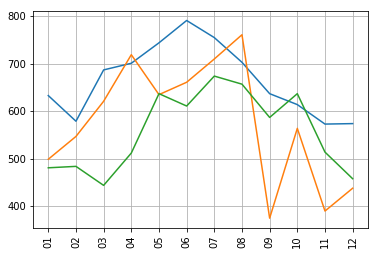

In [9]:
plt.plot(info_plot_2007.index, info_plot_2007.agency_name)
plt.plot(info_plot_2008.index, info_plot_2008.agency_name)
plt.plot(info_plot_2009.index, info_plot_2009.agency_name)
plt.xticks(rotation=90)
plt.grid()